# Statistical analysis of the survey results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import aux_functions as aux


In [2]:
main_data, keys = aux.prepare_data()
main_data.head()

,Sygnatura czasowa,Consent,Are you a native English speaker?,What age group do you belong to?,What is your gender?,What field do you study in?,Which search engine do you normally use?,Which search engines have you used before?,Have you used Yippy before participating in the survey?,What was your chosen phrase?,...,Yippy clustering feature - how useful did you find it?,How easy did you find Yippy to use?,How would you rate the speed of the search?,How much do you prefer Google over Yippy?,What did you like about Yippy?,What did you not like about Yippy?,How likely are you to return to Yippy?,Any other comments and remarks?,What did you think of our evaluation?,Comment and Remarks on the evaluation?
0,2019-11-22 17:05:30,Confirm,No,18-22,Female,Business School,Google,Google;Baidu;Bing,No,K-pop,...,9,10,10,7,NaN,NaN,10,yes,7,Baby yoda? really
1,2019-11-25 13:17:13,Confirm,Yes,18-22,Female,Arts and Social Sciences,Google,Google;Yahoo;Bing,No,Psychology,...,9,10,8,5,The suggestion of clusters,There were very little results for videos (onl...,3,NaN,10,BABY YODA <3
2,2019-11-25 13:25:04,Confirm,No,18-22,Male,"Chemistry, Physics and Mathematics",Google,Google;Yahoo;Bing;AOL;Ask,No,imaginary numbers,...,8,7,10,5,cluster allows to find similar topics related ...,Design looks slightly out dated,4,NaN,8,NaN
3,2019-11-25 13:25:14,Confirm,No,18-22,Male,"Chemistry, Physics and Mathematics",Google,Google;DuckDuckGo;Ecosia,No,toronto raptors trading kawhi leonard,...,6,10,6,1,"News seemed to be more relevant, whereas googl...",Nothing appeared to me as 'unlikeable',5,NaN,10,NaN
4,2019-11-25 13:30:00,Confirm,Yes,18-22,Male,Engineering,Google,Google;Yahoo;Bing,No,basketball teams,...,10,9,10,5,like how clustering feature helps narrow down ...,design could look better,7,NaN,10,NaN


## Search tasks: paired t-tests (Yippy vs Google)

In [3]:
tasks = keys['tasks']
tasks_data = main_data[keys['tasks']]
tasks_data.head()

,Web search results relevance - Google,Web search results relevance - Yippy,Image search results relevance - Google,Image search results relevance - Yippy,Video search results relevance - Google,Video search results relevance - Yippy,News search results relevance - Google,News search results relevance - Yippy
0,1,9,8,4,10,1,5,5
1,10,9,10,10,10,4,8,8
2,9,8,7,9,9,4,4,4
3,10,10,9,10,9,9,7,8
4,9,8,10,10,10,9,10,10


In [4]:
t_tests = {}

for i in range(0,len(tasks),2):
    task = tasks[i].split(' ')[0]
    
    google = tasks_data[tasks[i]]
    yippy = tasks_data[tasks[i+1]]
    
    stat, pval = stats.ttest_rel(google, yippy)
    
    t_tests[task] = (google.mean(), google.std(),
                     yippy.mean(), yippy.std(),
                     stat, pval)

index = ['mean (Google)', 'std (Google)',
         'mean (Yippy)', 'std (Yippy)',
         't-statistic', 'p-value (2-tailed)']

pd.DataFrame(t_tests, index=index).round(3)

,Web,Image,Video,News
mean (Google),8.355,8.065,7.613,5.903
std (Google),1.924,1.459,2.231,2.868
mean (Yippy),7.710,7.774,5.161,5.065
std (Yippy),1.970,2.261,3.377,3.549
t-statistic,1.283,0.695,3.465,1.773
p-value (2-tailed),0.209,0.493,0.002,0.086



## Yippy clustering feature: single-sample t-tests

In [5]:

cluster_data = main_data[keys['clustering']]
cluster_data.head()


,Yippy clustering feature - how relevant were the topics?,Yippy clustering feature - how useful did you find it?
0,9,9
1,10,9
2,6,8
3,8,6
4,10,10


In [6]:

t_tests_clustering = {}

for question in cluster_data.keys():    
    question_data = cluster_data[question]
    stat, pval = stats.ttest_1samp(question_data, 5.5)
    
    t_tests_clustering[question] = (question_data.mean(), question_data.std(), stat, pval)


index = ['mean', 'std', 't-statistic', 'p-value (2-tailed)']

clustering_df = pd.DataFrame(t_tests_clustering, index=index)
clustering_df


,Yippy clustering feature - how relevant were the topics?,Yippy clustering feature - how useful did you find it?
mean,7.322581,7.322581
std,2.150769,2.737238
t-statistic,4.718173,3.707277
p-value (2-tailed),0.000052,0.000848





## Yippy - general experience: single-sample t-tests

In [7]:
yippy_data = main_data[keys['yippy']]
yippy_data.head()

,How easy did you find Yippy to use?,How would you rate the speed of the search?,How much do you prefer Google over Yippy?,How likely are you to return to Yippy?
0,10,10,7,10
1,10,8,5,3
2,7,10,5,4
3,10,6,1,5
4,9,10,5,7


In [8]:
t_tests_yippy = {}

for question in yippy_data.keys():    
    question_data = yippy_data[question]
    stat, pval = stats.ttest_1samp(question_data, 5.5)
    
    t_tests_yippy[question] = (question_data.mean(), question_data.std(), stat, pval)

index = ['mean', 'std', 't-statistic', 'p-value (2-tailed)']
t_tests_yippy_df = pd.DataFrame(t_tests_yippy, index=index)
t_tests_yippy_df

,How easy did you find Yippy to use?,How would you rate the speed of the search?,How much do you prefer Google over Yippy?,How likely are you to return to Yippy?
mean,8.129032e+00,7.645161,7.064516,4.709677
std,1.892827e+00,2.090429,2.322864,2.923395
t-statistic,7.733316e+00,5.713542,3.750050,-1.505212
p-value (2-tailed),1.255565e-08,0.000003,0.000755,0.142727


In [9]:
t_tests_yippy_df.round(3)

,How easy did you find Yippy to use?,How would you rate the speed of the search?,How much do you prefer Google over Yippy?,How likely are you to return to Yippy?
mean,8.129,7.645,7.065,4.710
std,1.893,2.090,2.323,2.923
t-statistic,7.733,5.714,3.750,-1.505
p-value (2-tailed),0.000,0.000,0.001,0.143


## Correlation of answers

In [10]:
keys

{'clustering': ['Yippy clustering feature - how relevant were the topics?',
  'Yippy clustering feature - how useful did you find it?'],
 'eval': ['What did you think of our evaluation?'],
 'general': ['Are you a native English speaker?',
  'What age group do you belong to?',
  'What is your gender?',
  'What field do you study in?'],
 'phrase': ['What was your chosen phrase?'],
 'remarks_eval': ['Comment and Remarks on the evaluation?'],
 'remarks_yippy': ['What did you like about Yippy?',
  'What did you not like about Yippy?',
  'Any other comments and remarks?'],
 'search_engines': ['Which search engine do you normally use?',
  'Which search engines have you used before?',
  'Have you used Yippy before participating in the survey?'],
 'tasks': ['Web search results relevance - Google',
  'Web search results relevance - Yippy',
  'Image search results relevance - Google',
  'Image search results relevance - Yippy',
  'Video search results relevance - Google',
  'Video search results 

In [85]:
corr_keys = keys['tasks'] #  + keys['clustering'] + keys['yippy']
corr_keys

['Web search results relevance - Google',
 'Web search results relevance - Yippy',
 'Image search results relevance - Google',
 'Image search results relevance - Yippy',
 'Video search results relevance - Google',
 'Video search results relevance - Yippy',
 'News search results relevance - Google',
 'News search results relevance - Yippy']

In [86]:
corr_data = main_data[corr_keys]
corr_data.head()

,Web search results relevance - Google,Web search results relevance - Yippy,Image search results relevance - Google,Image search results relevance - Yippy,Video search results relevance - Google,Video search results relevance - Yippy,News search results relevance - Google,News search results relevance - Yippy
0,1,9,8,4,10,1,5,5
1,10,9,10,10,10,4,8,8
2,9,8,7,9,9,4,4,4
3,10,10,9,10,9,9,7,8
4,9,8,10,10,10,9,10,10


In [87]:
corr_result = corr_data.corr()

In [101]:
corr_labels = [' - '.join(np.array(label.split(' '))[[0, -1]]) for label in corr_keys]
corr_labels_pos = np.arange(len(corr_labels))
corr_labels

['Web - Google',
 'Web - Yippy',
 'Image - Google',
 'Image - Yippy',
 'Video - Google',
 'Video - Yippy',
 'News - Google',
 'News - Yippy']

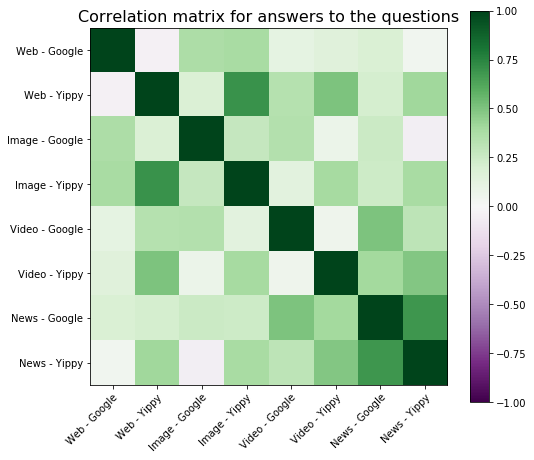

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
corr_im = ax.imshow(corr_result, cmap='PRGn', vmin=-1, vmax=1)
ax.set_title("Correlation matrix for answers to the questions", fontsize=16)

ax.set_xticks(corr_labels_pos)
ax.set_yticks(corr_labels_pos)
ax.set_xticklabels(corr_labels)
ax.set_yticklabels(corr_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xlim(-0.5, len(corr_labels)-0.5)
ax.set_ylim(len(corr_labels)-0.5, -0.5)

fig.colorbar(corr_im, ax=ax, shrink=0.9)